##  HR Analytic Project

### Data Description

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

### Import Liberary

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder  # COnvert string data to into the numeric data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")


In [89]:
df=pd.read_excel("C:\Data\WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

In [90]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [91]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [92]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [93]:
# there is column employee number in the data set its does not help us , so we drop it
df.drop(columns=["EmployeeNumber"],inplace= True)

In [94]:
# Lets see over 18 column
df["Over18"].unique()
#This column has only one value throught out the dataset, So it will not help us any way , so lets drop it

array(['Y'], dtype=object)

In [95]:
df.drop(columns=["Over18"],inplace=True)

In [96]:
# Lets check the count of attrition
import seaborn as sns
import matplotlib.pyplot as plt

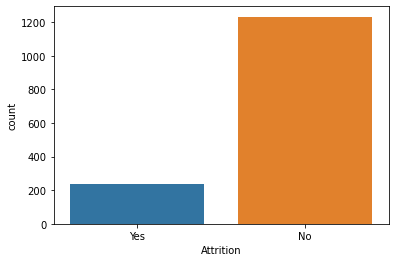

In [97]:
sns.countplot(x="Attrition",data=df)

This is highly imblance data set, here out of 7 employee 1 is facing Attrition

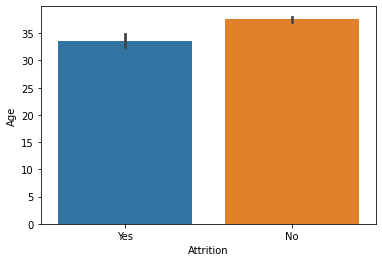

In [98]:
# Lets check average of Employee
sns.barplot(x="Attrition",y="Age",data=df)

Below the Graph show people who are staying have average more

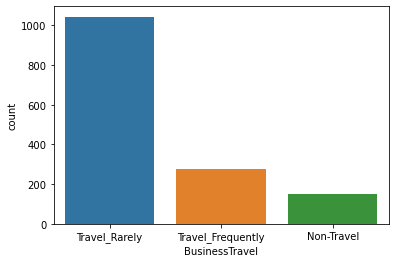

In [99]:
# Lets check count of employee based on business travel
sns.countplot(x="BusinessTravel",data=df)

Most of the Employee travel rarely

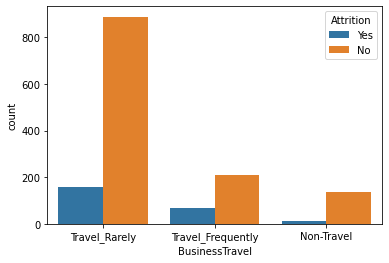

In [100]:
# Lets see the count of each category of business travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")

based on the graph we conclude that portion of attrttion is higher where travel is frequent

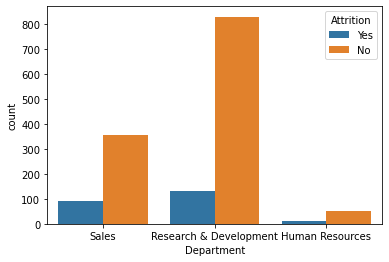

In [101]:
# Lets check in which department attrition is high
sns.countplot(x="Department",data=df,hue="Attrition")

here as we comapre between sales and resarch department 1 out of 4 and 1 out of 9 ppl attrition ratio is coming

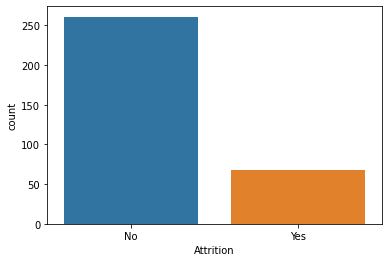

In [102]:
# Lets check when distance from home is above 15 km whats the attition
sns.countplot(x="Attrition",data=df.loc[df["DistanceFromHome"]>15])

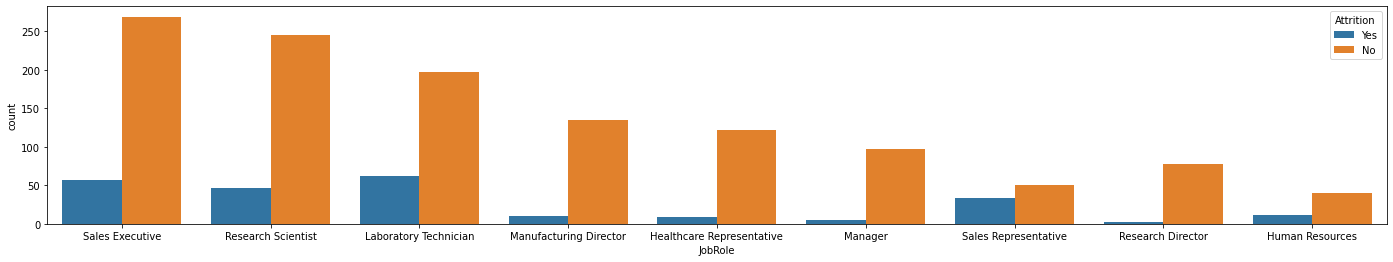

In [103]:
# Lets check the Attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=df,hue="Attrition")

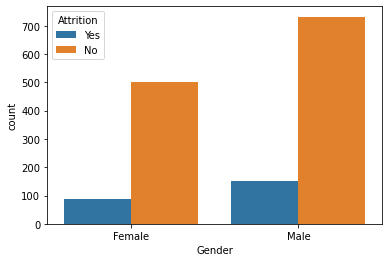

In [104]:
#Lets check the Attrition Ratio based on Gander
sns.countplot(x="Gender",data=df,hue="Attrition")


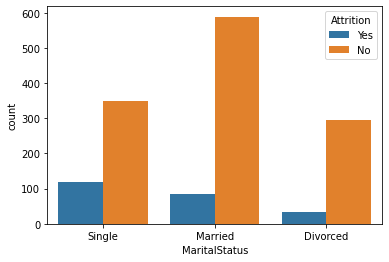

In [105]:
# Lets Check the Attrition in Marital Status
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")

Single Ratio is higher

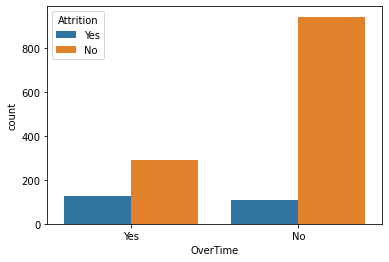

In [106]:
# Lets check the portion of Attration based on Overtime
sns.countplot(x="OverTime",data=df,hue="Attrition")

Overtime increase the ittrition Level

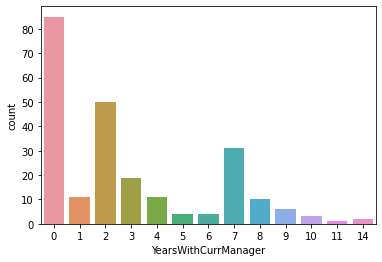

In [107]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])

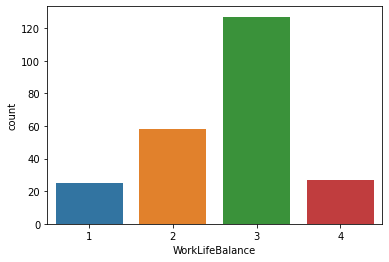

In [108]:
# Lest Check the work life balance with Attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])

So here we get that what is the average numaber of employee staying in company before leaving

In [109]:
# Lets check the time laped since the last pramotion
df.loc[df["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})

,Attrition
YearsSinceLastPromotion,
0,110
1,49
2,27
3,9
4,5
5,2
6,6
7,16
9,4


Here majority almost half of people left not even single year of passing since last pramotion
we can conclude promotion is not the factor why people left the company

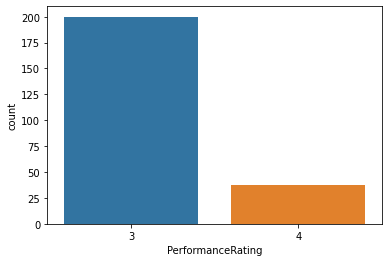

In [110]:
# Lets check how performance rating affecting the Attrition Level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])

Worker deserved more rating while they are undervalued
almsot all ppl left who got 3 rating

In [111]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

Here we can see that EmployeeCount have same value in entire dataset

In [112]:
# Lets Drop the EmployeeCount data set
df.drop(columns=["EmployeeCount"],inplace=True)


In [113]:
# lets drop the standardHour they not provided any information
df.drop(columns=["StandardHours"],inplace=True)

In [114]:
# Check the correlation Matrix
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


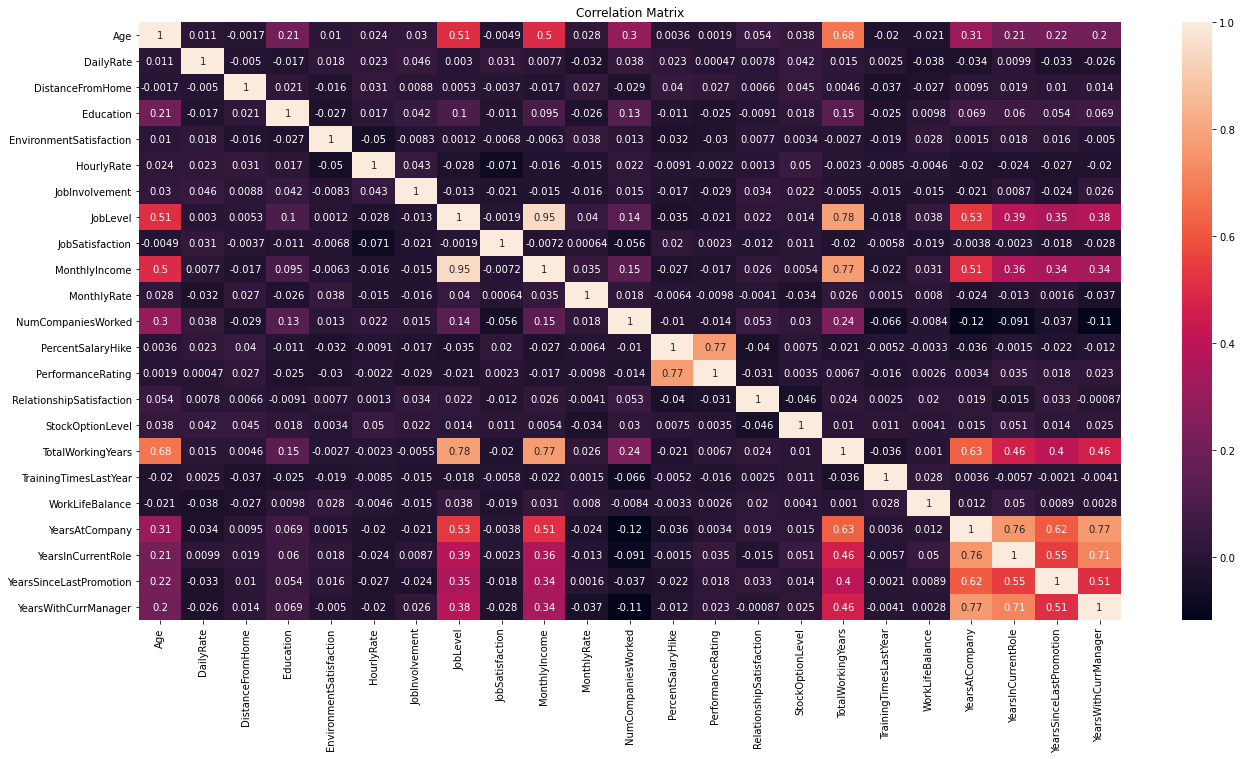

In [115]:
corr_mat=df.corr()
plt.figure(figsize=[22,11])
plt.title("Correlation Matrix")
sns.heatmap(corr_mat,annot=True)

In [116]:
# Lets Check skewness in the data set
print(df.skew())
print("Total Count of Numeric Feature : ",len(df.skew()))
print("Count of feature which are significantaly skewed",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total Count of Numeric Feature :  23
Count of feature which are significantaly skewed 14


In [117]:
# lets Seprate the input and output columns
df_x=df.drop(columns=["Attrition"])
y=df[["Attrition"]]

In [118]:
# Lets treat the skewness at input dataset
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [119]:
#Lets again check the skewness
print(df_x.skew())
print("Total Count of Numeric Feature : ",len(df.skew()))
print("Count of feature which are significantaly skewed",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total Count of Numeric Feature :  23
Count of feature which are significantaly skewed 14


In [120]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state",maxRS)
    

Best Accuracy is  0.9160997732426304 on Random_state 123


In [121]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8684807256235828
[[359  16]
 [ 42  24]]
              precision    recall  f1-score   support

          No       0.90      0.96      0.93       375
         Yes       0.60      0.36      0.45        66

    accuracy                           0.87       441
   macro avg       0.75      0.66      0.69       441
weighted avg       0.85      0.87      0.85       441



In [122]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8684807256235828
[[359  16]
 [ 42  24]]
              precision    recall  f1-score   support

          No       0.90      0.96      0.93       375
         Yes       0.60      0.36      0.45        66

    accuracy                           0.87       441
   macro avg       0.75      0.66      0.69       441
weighted avg       0.85      0.87      0.85       441



In [123]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,preddt))


0.8684807256235828
[[359  16]
 [ 42  24]]
              precision    recall  f1-score   support

          No       0.87      0.98      0.92       375
         Yes       0.61      0.17      0.26        66

    accuracy                           0.86       441
   macro avg       0.74      0.57      0.59       441
weighted avg       0.83      0.86      0.82       441



In [124]:
# Creating parameter List to pass GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={"max_depth":np.arange(2,15),
           "criterion":["gini",'entropy']}

In [125]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [127]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [128]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [129]:
accuracy_score(y_test,GCV_pred)

0.8662131519274376

In [130]:
import joblib
joblib.dump(GCV.best_estimator_,"HR Analytic Skill")

['HR Analytic Skill']